# Day 1, Part 4: Circular motion
Let's build some intuition for circular motion.

In [2]:
%matplotlib inline 

from IPython.display import Image
import matplotlib.pyplot as plt
import numpy as np

In [3]:
!pip install JSAnimation

  Stored in directory: /Users/jillnaiman1/Library/Caches/pip/wheels/3c/c2/b2/b444dffc3eed9c78139288d301c4009a42c0dd061d3b62cead
Successfully built JSAnimation


In [4]:
from JSAnimation.IPython_display import display_animation
from matplotlib import animation

In [ ]:
Nframes = 100
fig = plt.figure(figsize=(10,5))

rad = 0.5

ax = plt.subplots()

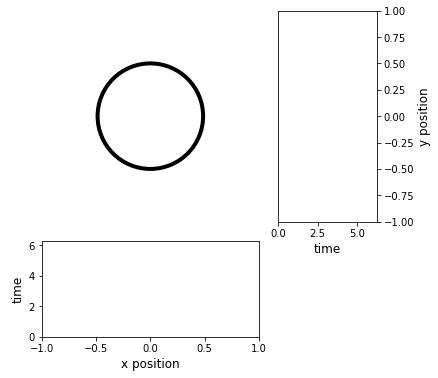

In [5]:
Nframes = 100
# First set up the figure, the axis, and the plot element we want to animate
fig = plt.figure(figsize=(6,6))

rad = 0.5
# ax = fig.add_subplot(111, xlim=(-2.*rad, 2.*rad), ylim=(-2.*rad, 2.*rad), aspect='equal')
ax = plt.subplot2grid((3,3), (0,0), colspan=2, rowspan=2, 
                      xlim=(-2.*rad, 2.*rad), ylim=(-2.*rad, 2.*rad), aspect='equal')
circ = plt.Circle((0, 0), radius=rad, facecolor="None", edgecolor='k', lw=4)
ax.add_patch(circ)
ax.grid(False)
ax.axis('off')
circle, = ax.plot([], [], marker='o', ms=10)

#ax1 = fig.add_subplot(212, ylim=(0, 2.*np.pi), xlim=(-2.*rad, 2.*rad))
ax1 = plt.subplot2grid((3,3), (2,0), colspan=2, ylim=(0, 2.*np.pi), xlim=(-2.*rad, 2.*rad), sharex=ax)
ax1.tick_params(axis='both', which='major', labelsize=10)
ax1.set_ylabel('time', fontsize=12)
ax1.set_xlabel('x position', fontsize=12)
x_pos_marker, = ax1.plot([], [], marker='o', ms=10, color='b')
x_pos_line, = ax1.plot([], [], color='k')

#ax2 = fig.add_subplot(122, xlim=(0, 2.*np.pi), ylim=(-2.*rad, 2.*rad))
ax2 = plt.subplot2grid((3,3), (0,2), rowspan=2, xlim=(0, 2.*np.pi), ylim=(-2.*rad, 2.*rad), sharey=ax)
ax2.yaxis.tick_right()
ax2.yaxis.set_label_position("right")
ax2.tick_params(axis='both', which='major', labelsize=10)
ax2.set_xlabel('time', fontsize=12)
ax2.set_ylabel('y position', fontsize=12)
y_pos_marker, = ax2.plot([], [], marker='o', ms=10, color='b')
y_pos_line, = ax2.plot([], [], color='k')



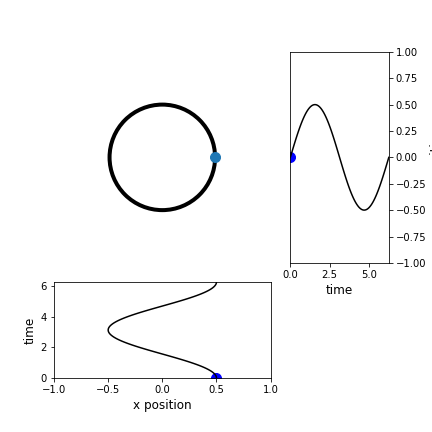
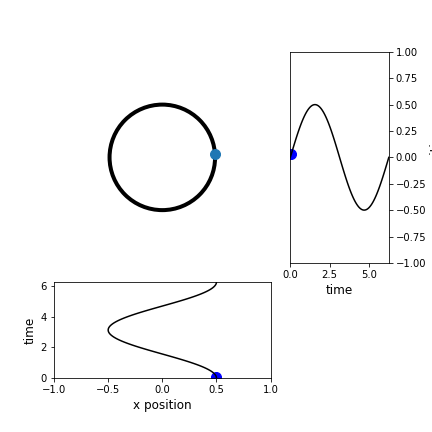
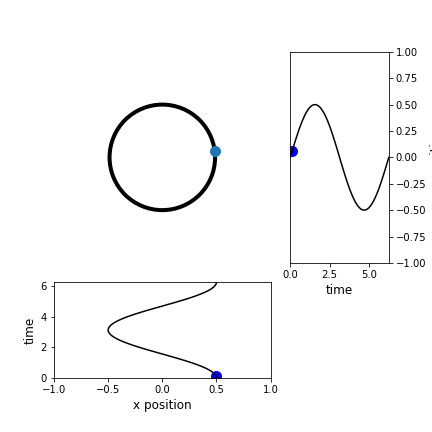
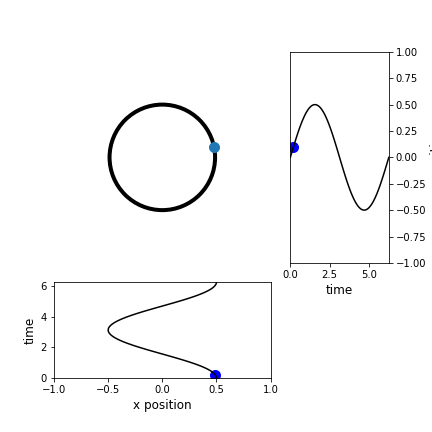
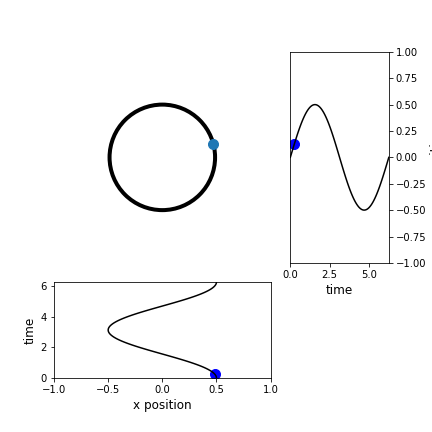
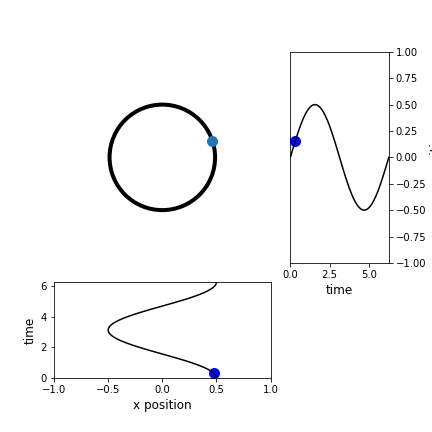
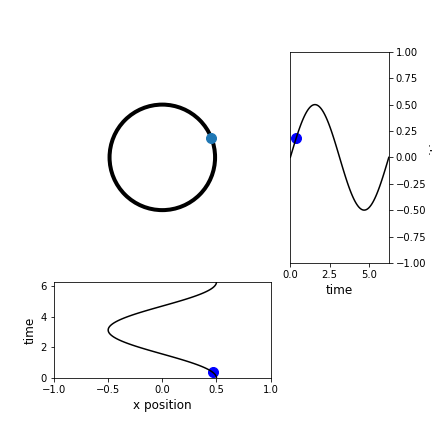
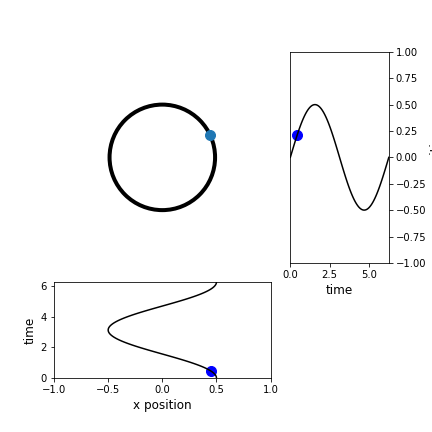
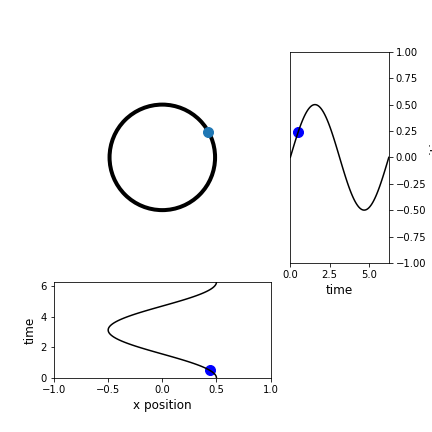
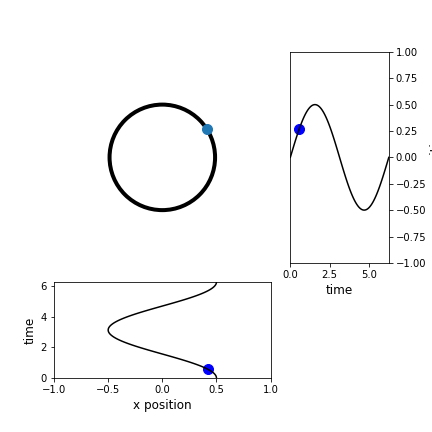
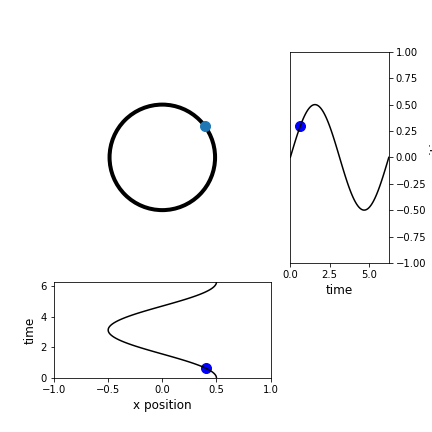
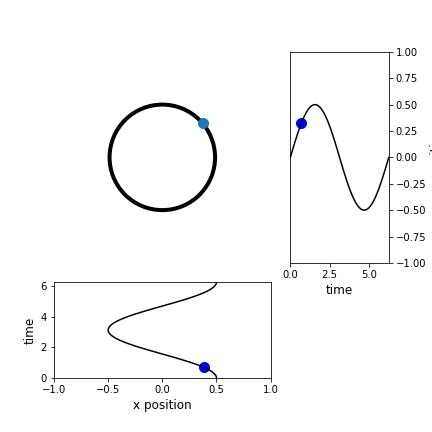
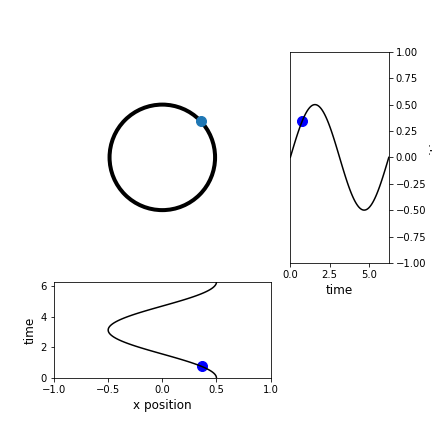
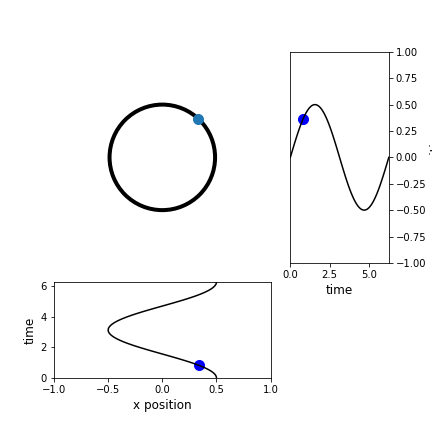
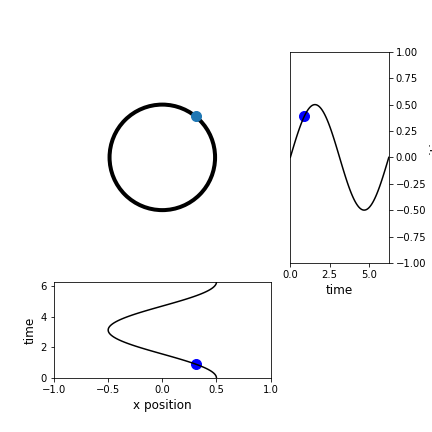
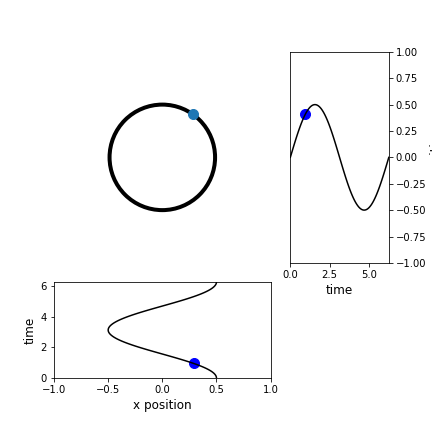
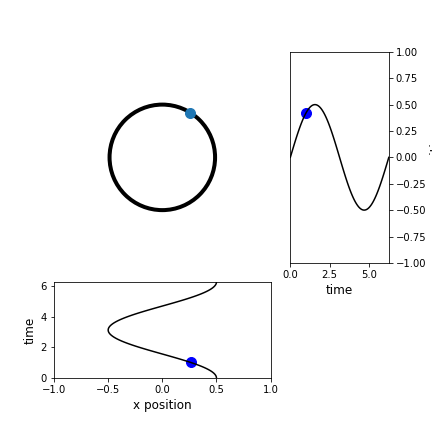
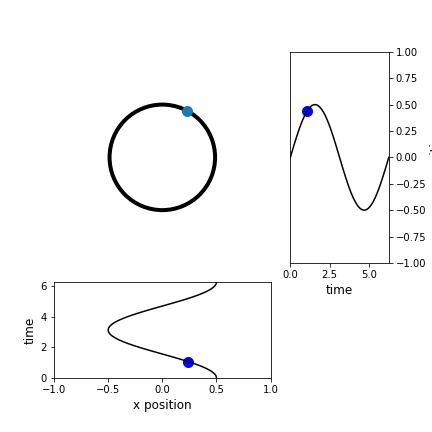
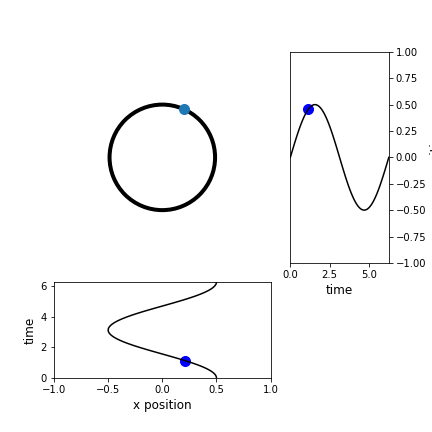
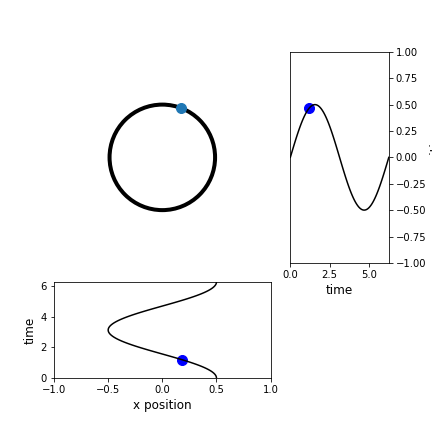
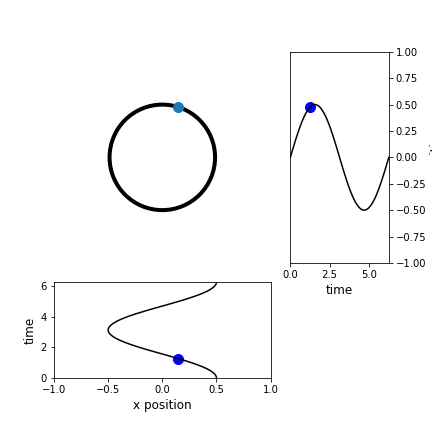
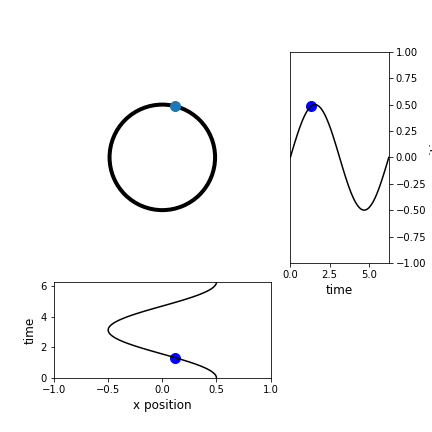
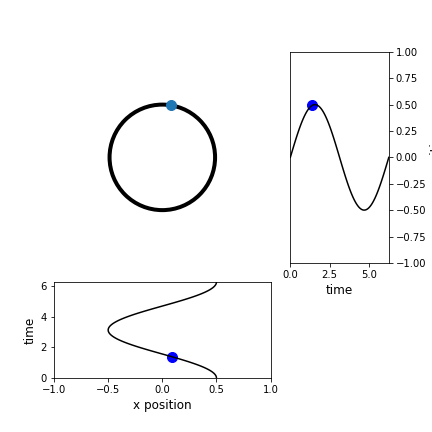
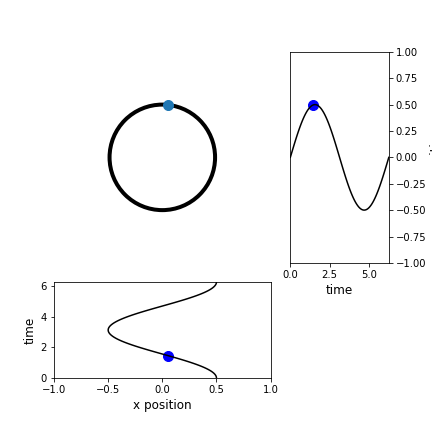
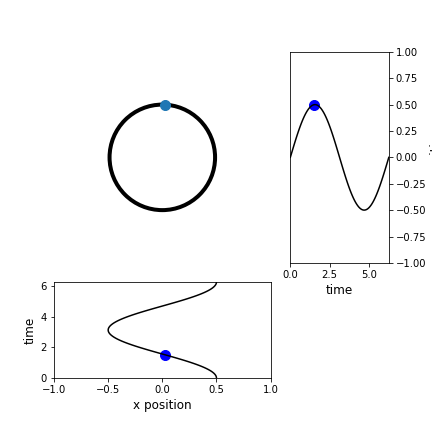
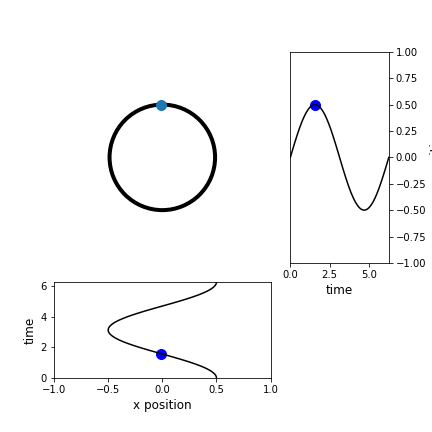
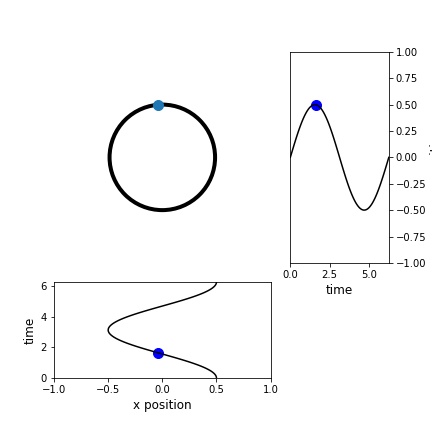
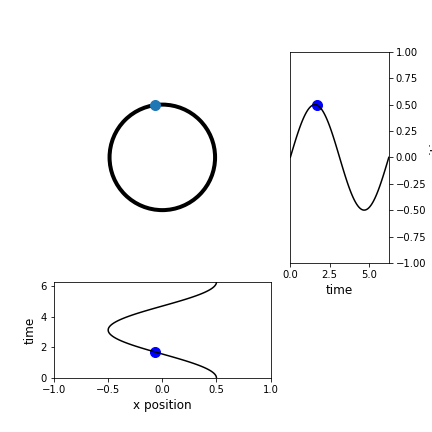
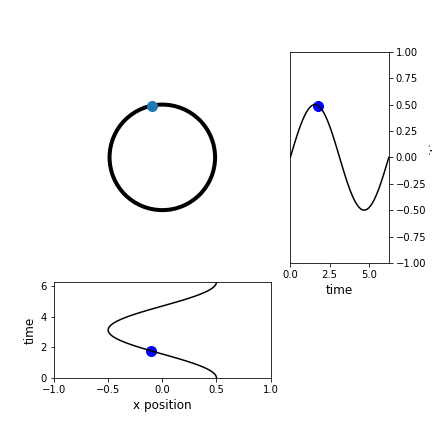
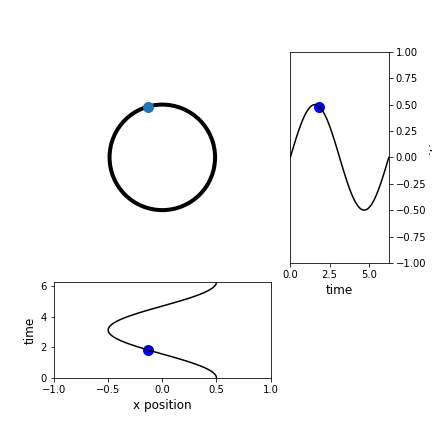
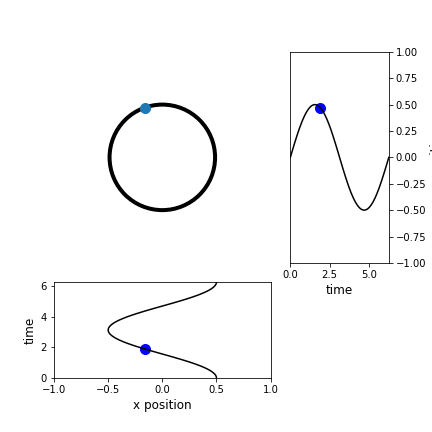
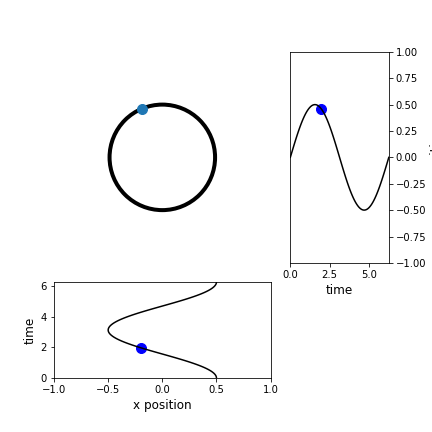
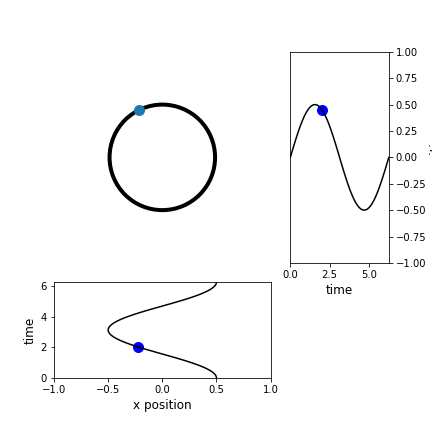
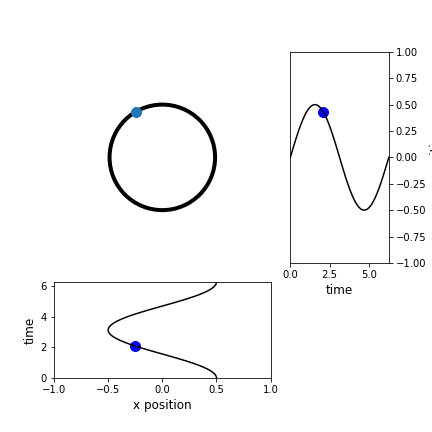
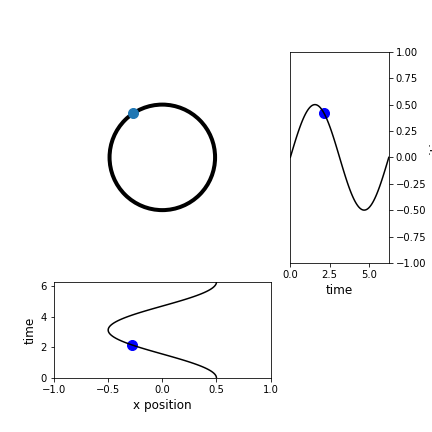
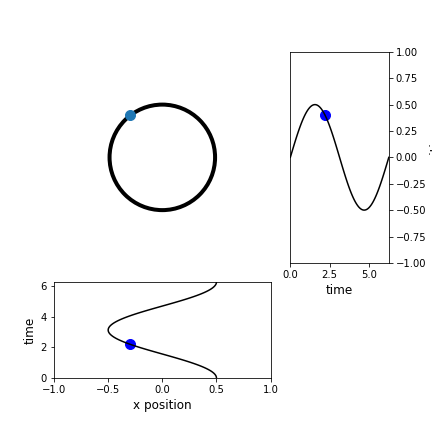
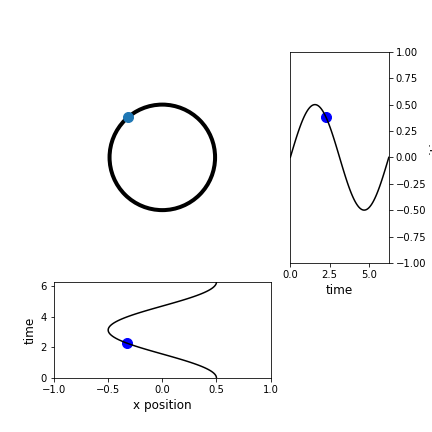
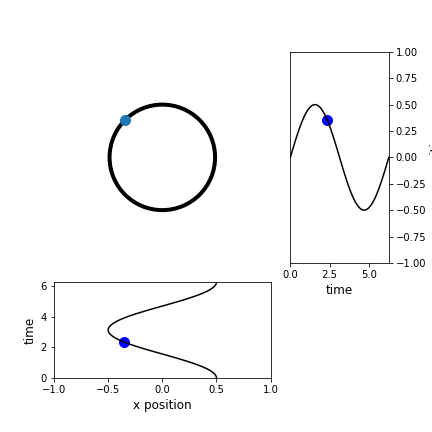
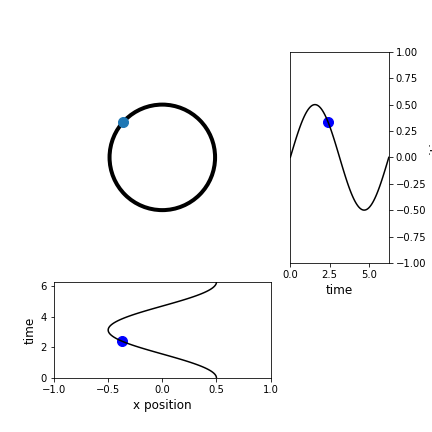
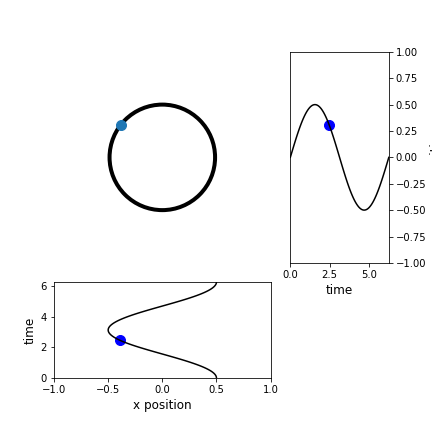
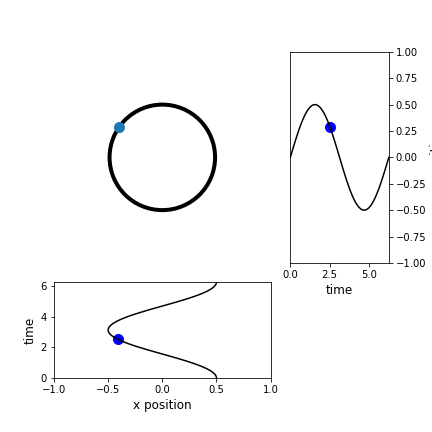
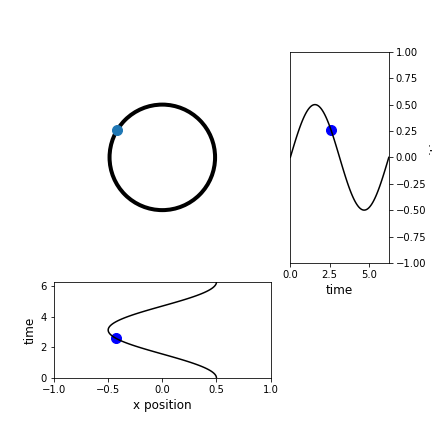
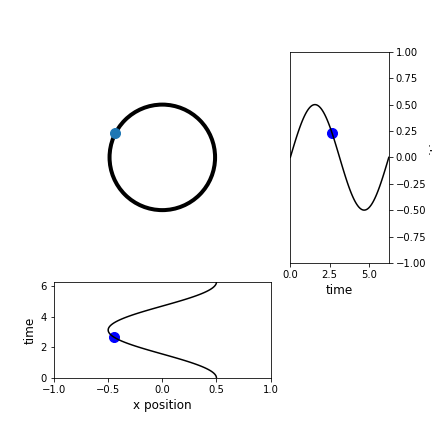
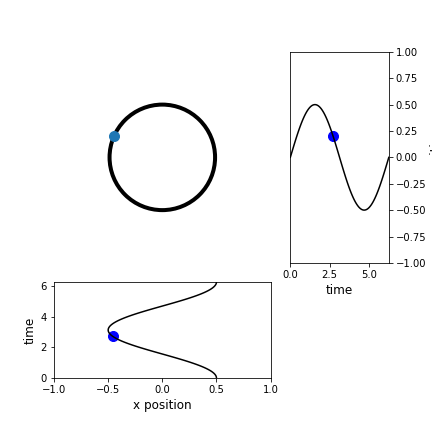
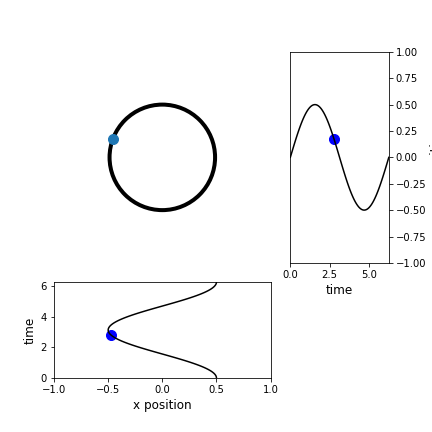
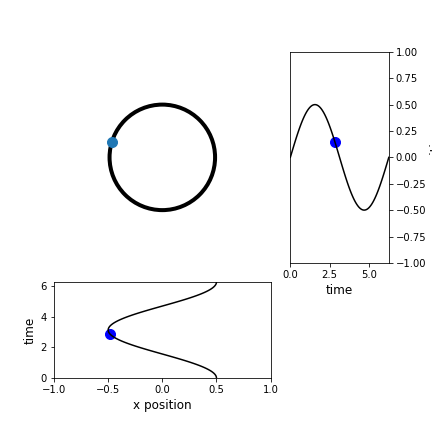
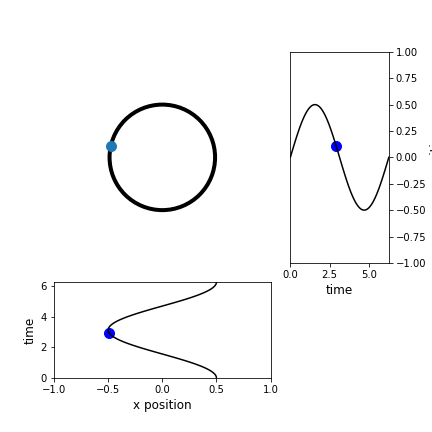
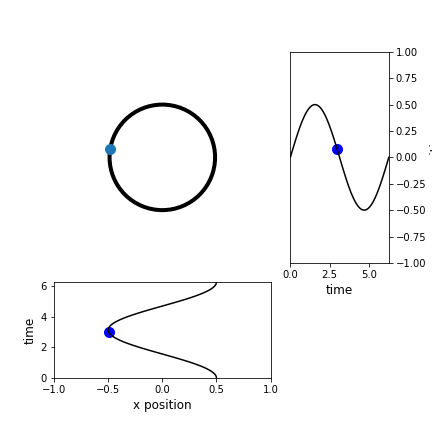
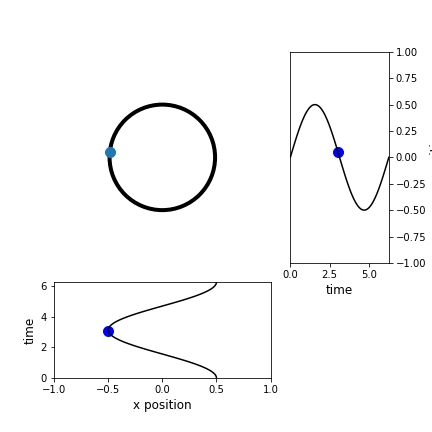
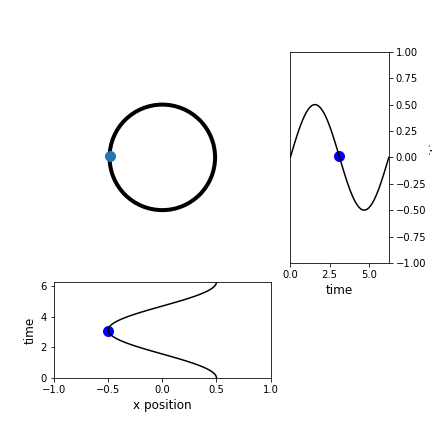
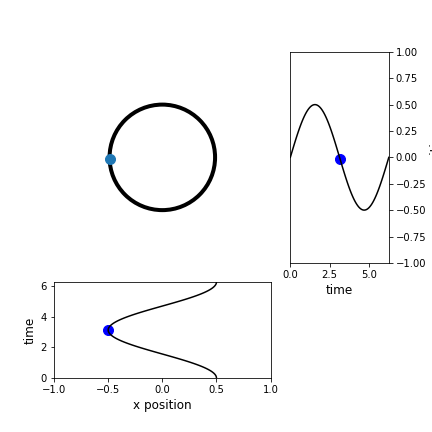
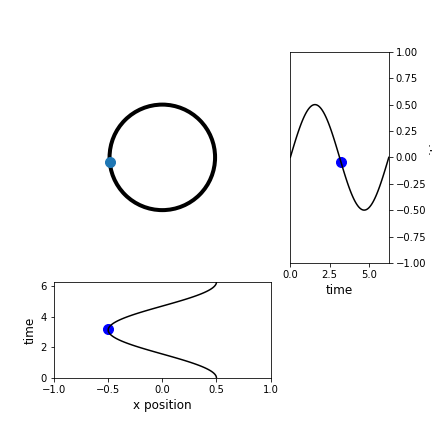
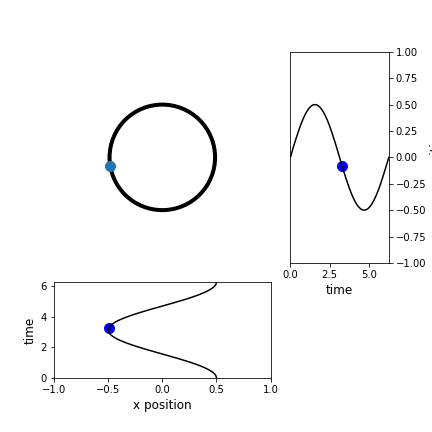
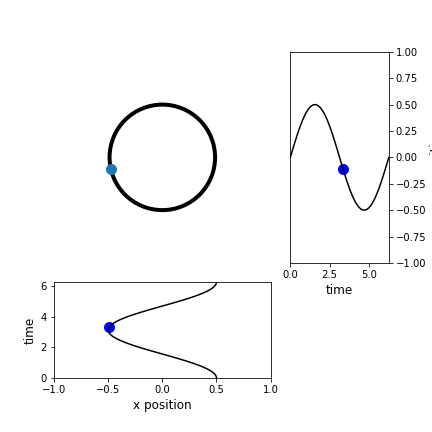
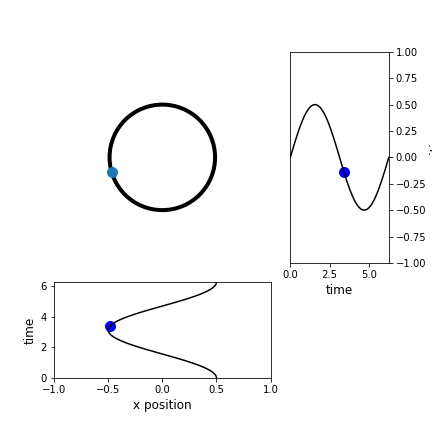
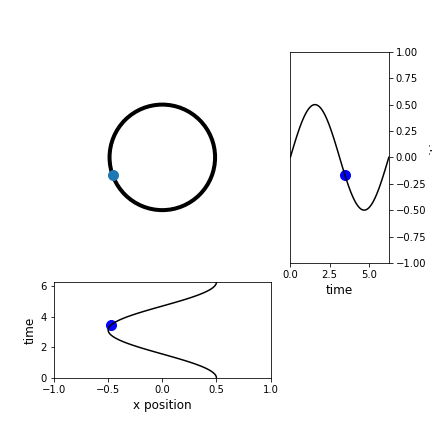
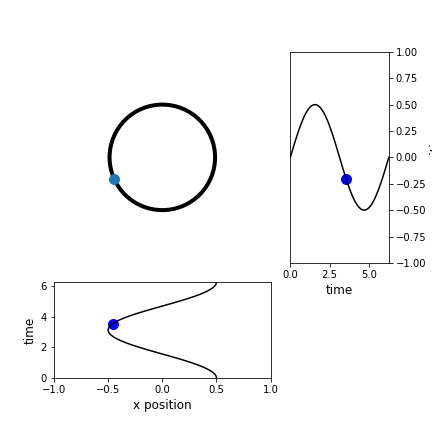
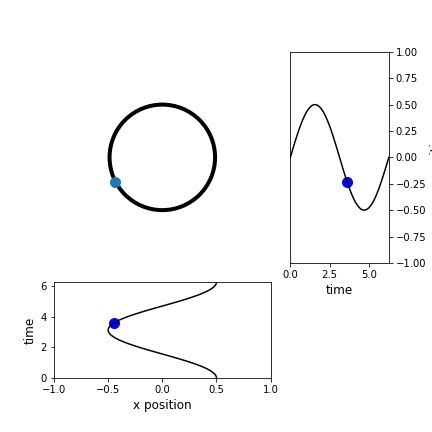
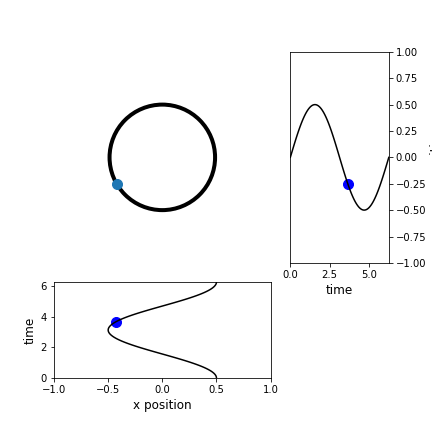
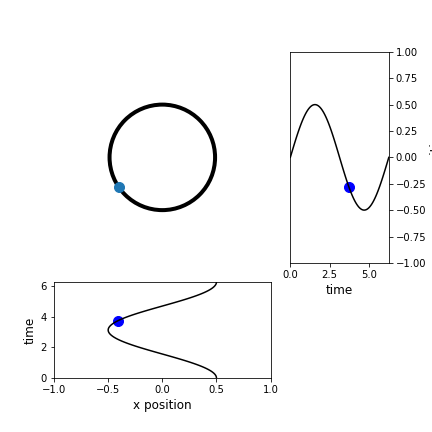
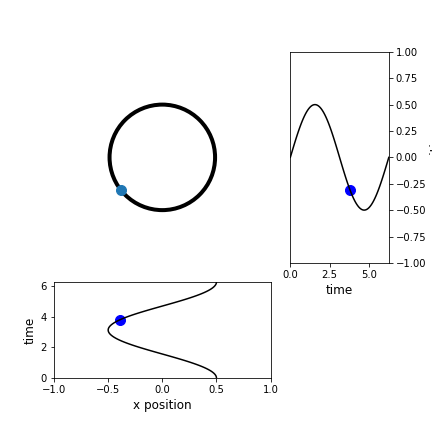
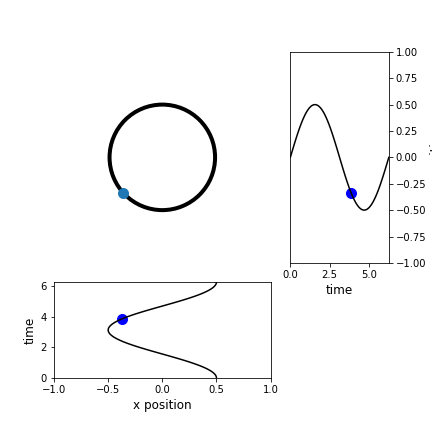
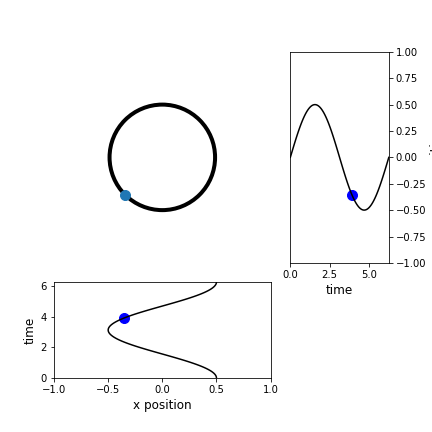
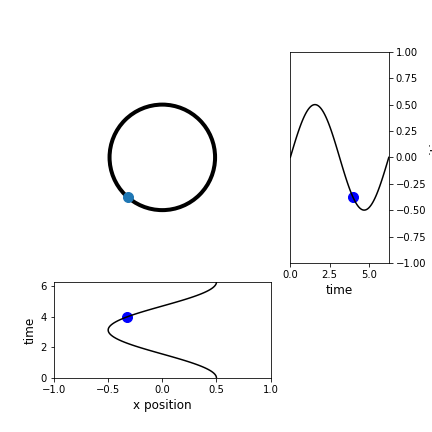
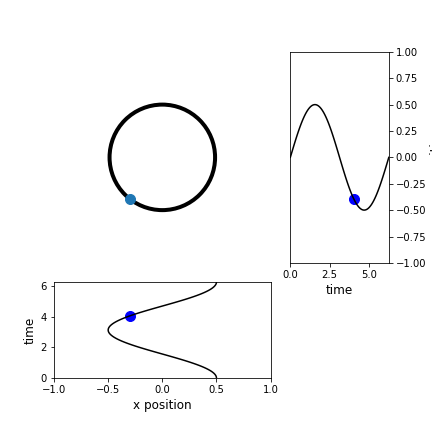
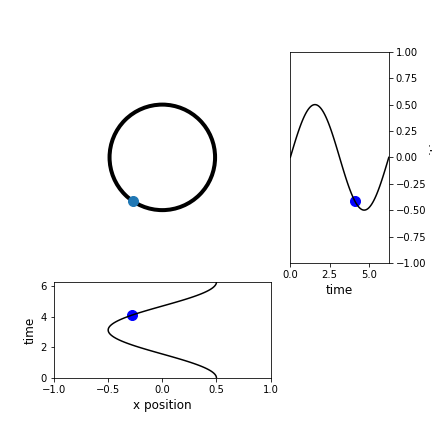
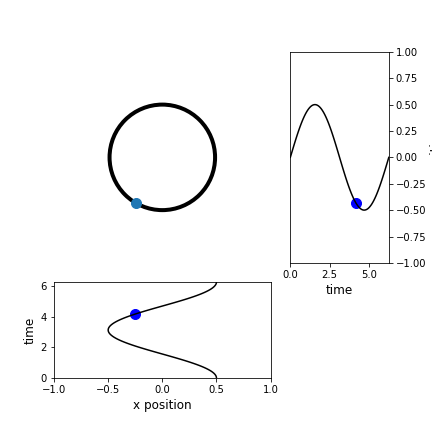
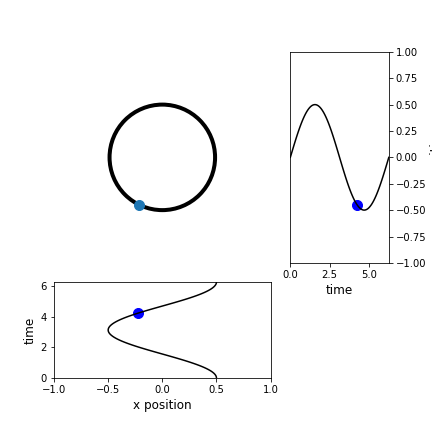
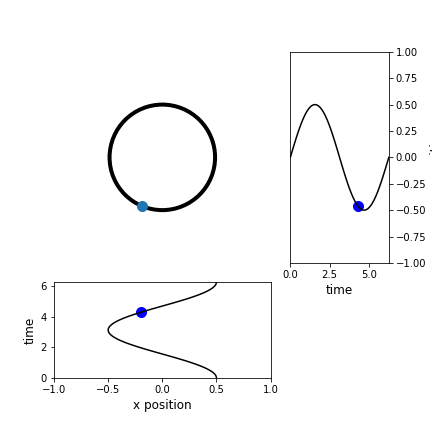
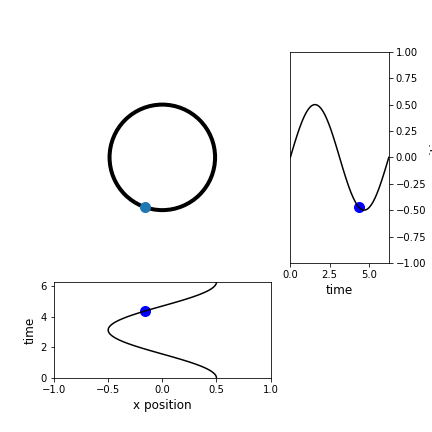
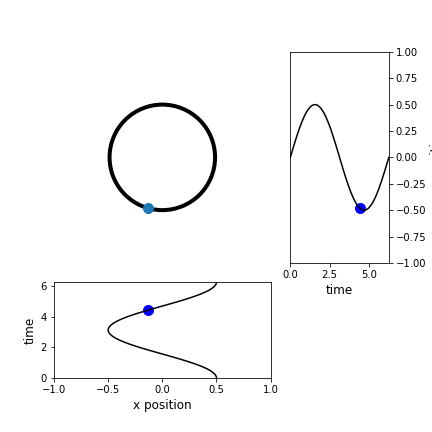
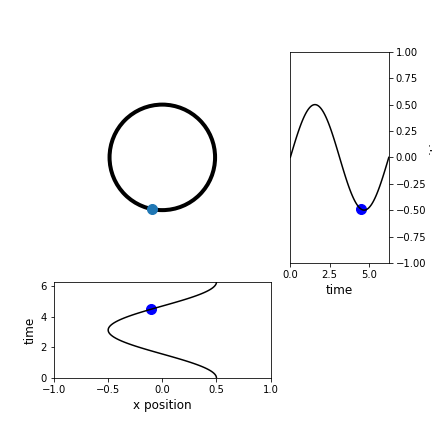
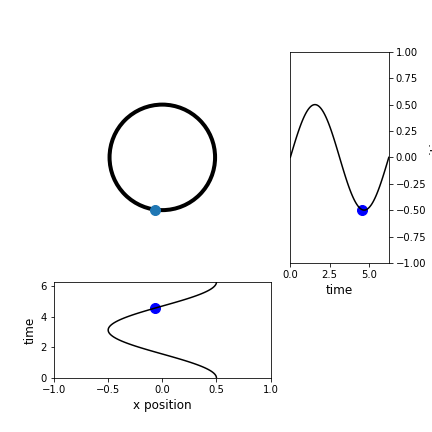
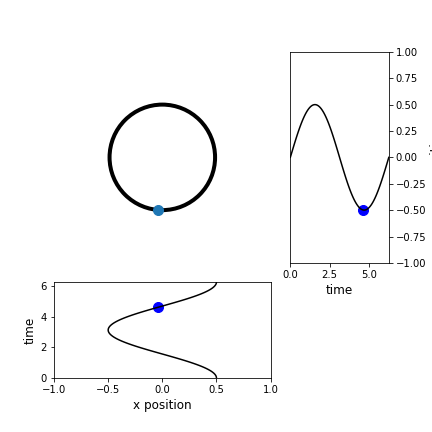
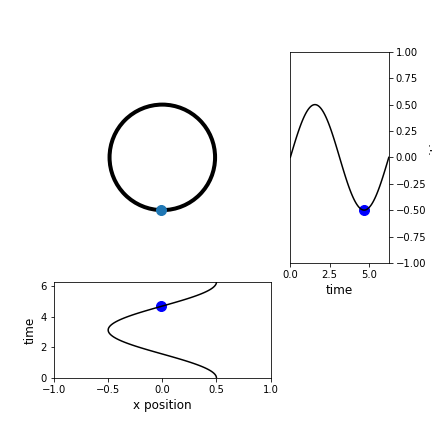
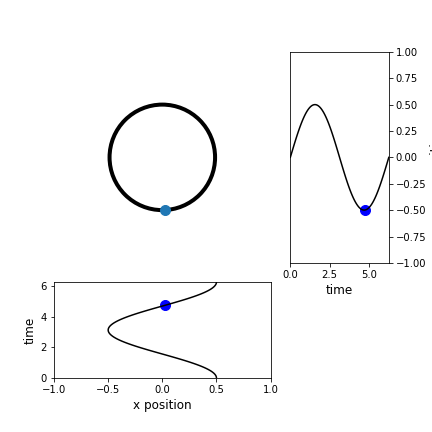
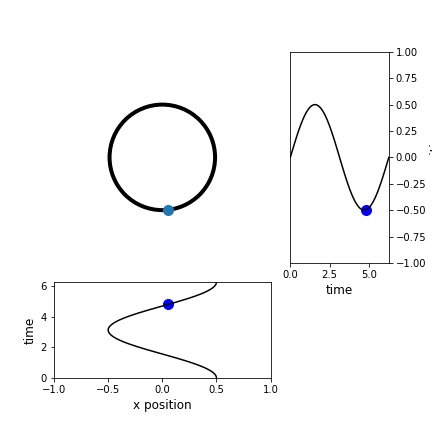
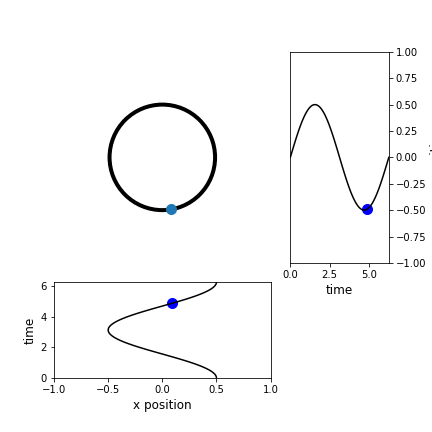
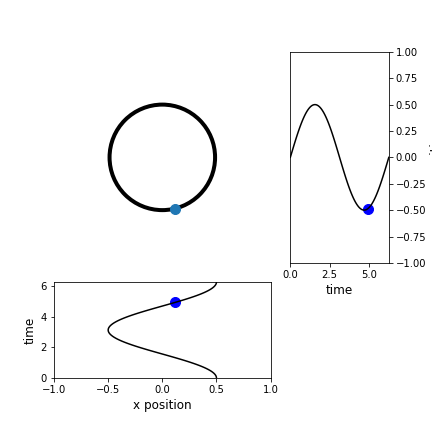
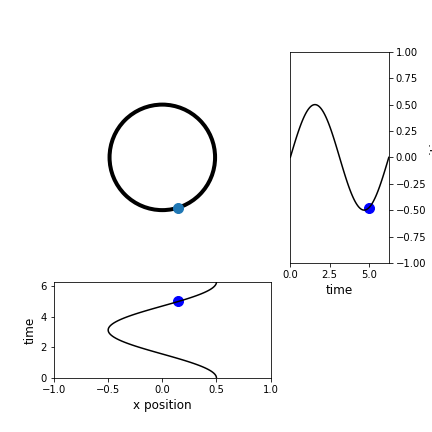
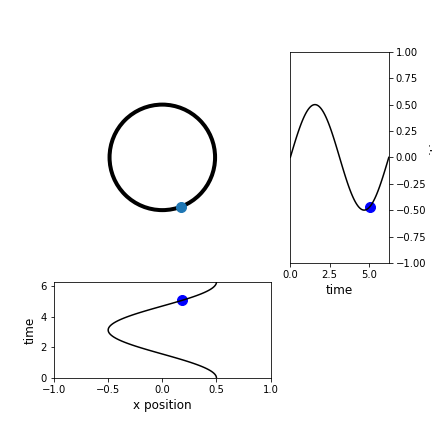
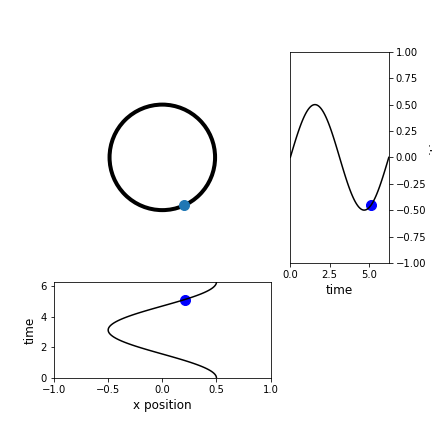
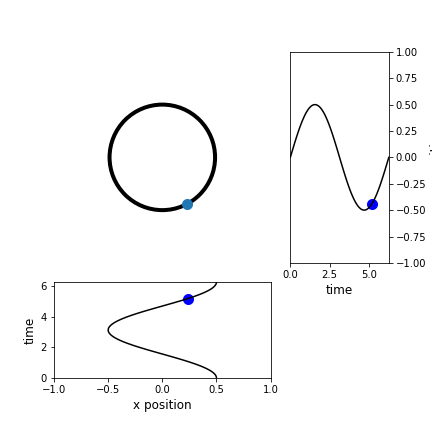
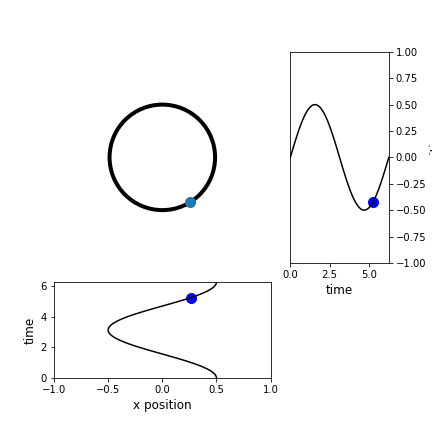
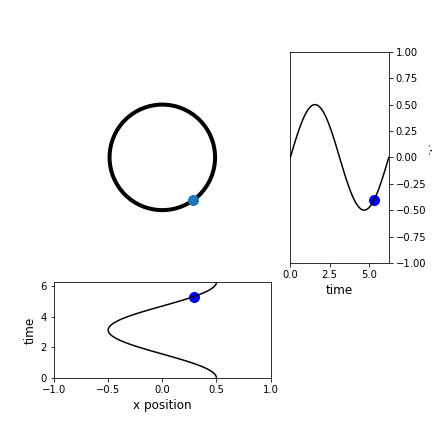
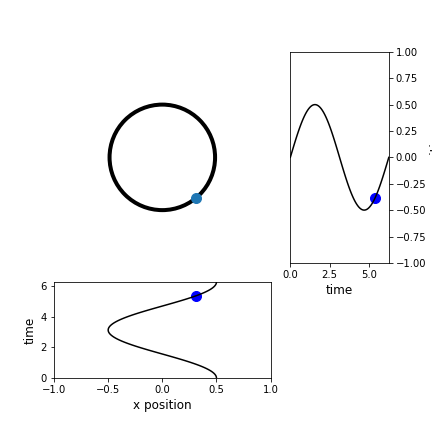
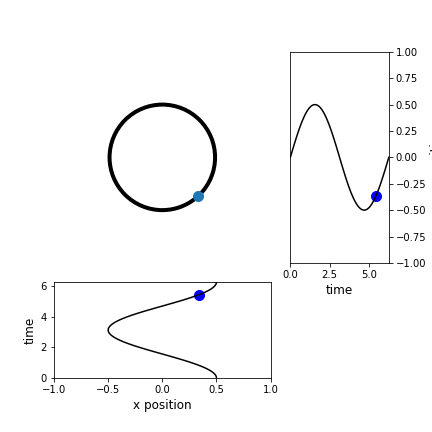
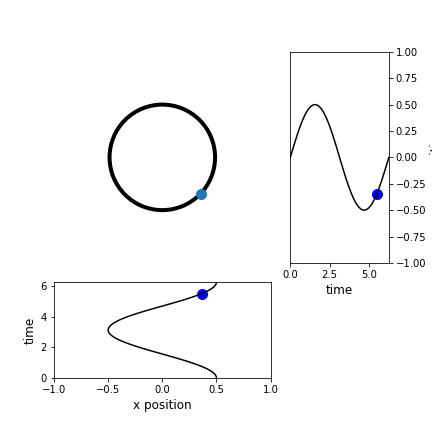
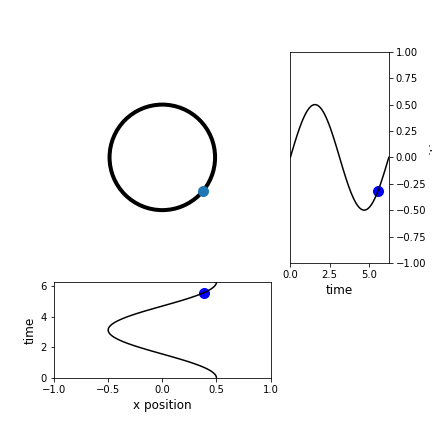
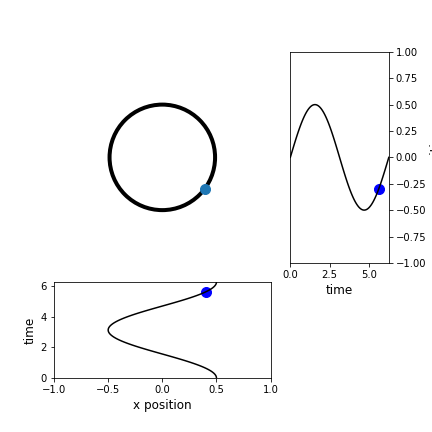
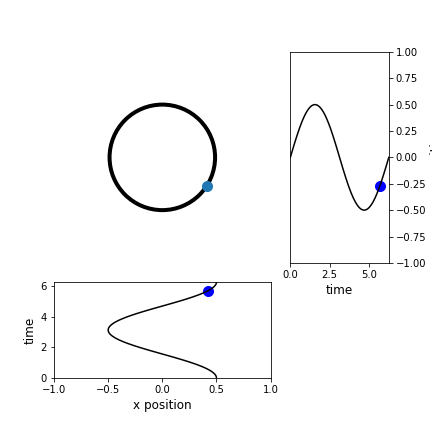
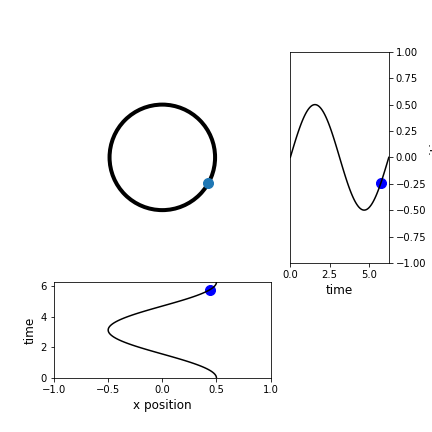
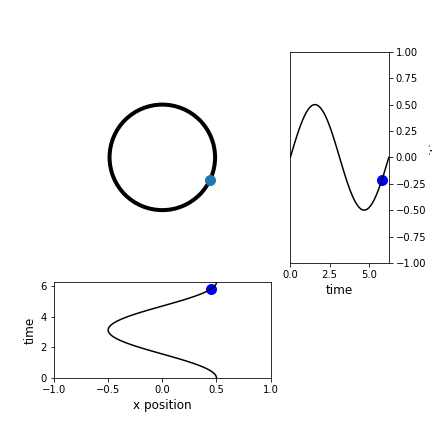
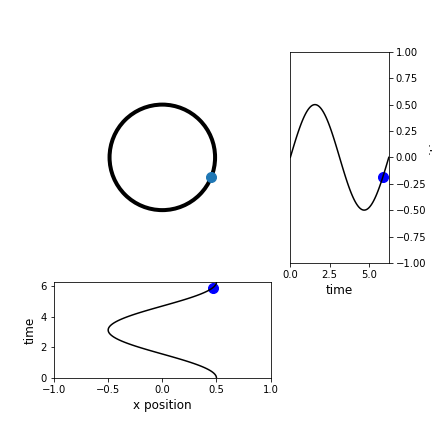
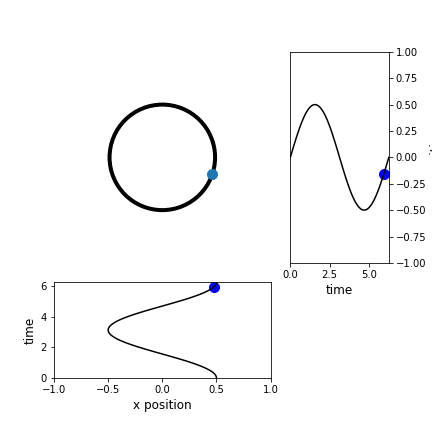
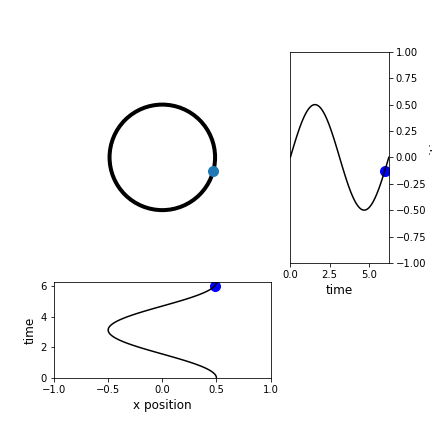
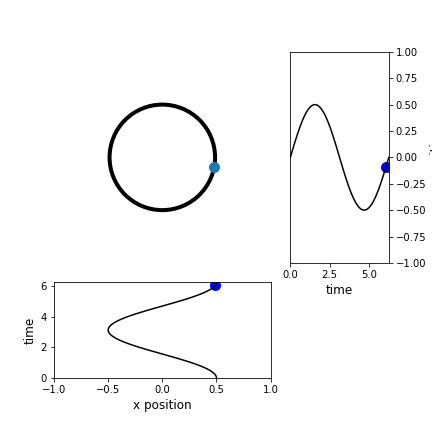
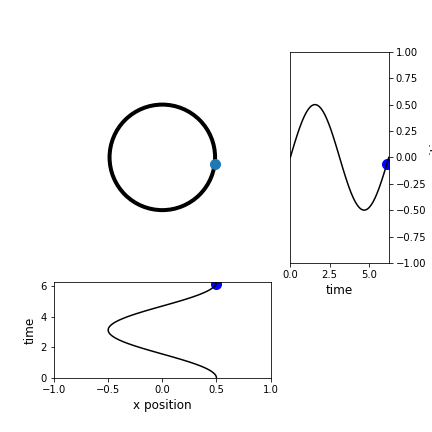
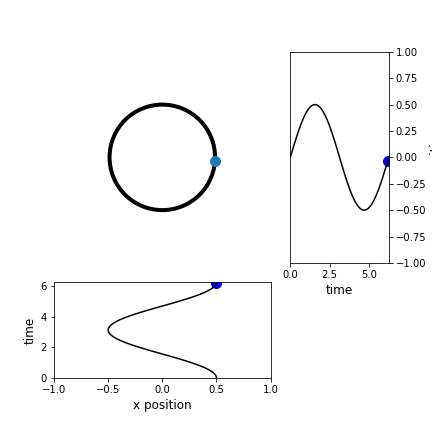
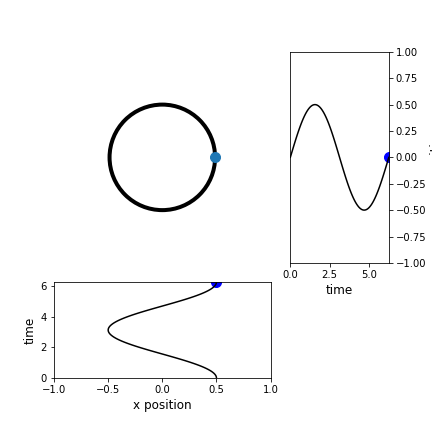

In [6]:

# initialization function: plot the background of each frame
def init():
    circle.set_data([], [])
    x_pos_marker.set_data([], [])
    y_pos_marker.set_data([], [])
    x_pos_line.set_data([], [])
    y_pos_line.set_data([], [])
    return circle, x_pos_marker, y_pos_marker, x_pos_line, y_pos_line

# This function moves the polygons as a function of the frame i
def animate(i):
    t = 2.*np.pi*float(i/(Nframes - 1.))
    x_marker = rad*np.cos(t)
    y_marker = rad*np.sin(t)
    circle.set_data(x_marker, y_marker)
    x_pos_marker.set_data(x_marker, t)
    y_pos_marker.set_data(t, y_marker)
    
    all_t = np.linspace(0, 2.*np.pi, Nframes)
    x = rad*np.cos(all_t)
    y = rad*np.sin(all_t)
    x_pos_line.set_data(x, all_t)
    y_pos_line.set_data(all_t, y)

    return circle, x_pos_marker, y_pos_marker, x_pos_line, y_pos_line
  
# call the animator.  blit=True means only re-draw the parts that have changed.
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=Nframes, interval=20, blit=True)

# call our new function to display the animation
display_animation(anim)